EDA Project

In [1]:
import pandas as pd

# Load the uploaded Excel file to examine the contents
file_path = 'Telco_customer_churn.xlsx'
data = pd.ExcelFile(file_path)

# Displaying the sheet names to understand the structure of the file
data.sheet_names

['Telco_Churn']

In [2]:
# Load the specific sheet into a DataFrame
df = data.parse('Telco_Churn')

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Step 1.1: Identify and handle missing values

In [3]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Churn Reason    5174
dtype: int64

In [4]:
# Step 1.1: Identify and handle missing values in 'Churn Reason'
print("Step 1.1: Handle Missing Values in 'Churn Reason'")
missing_churn_reason = df['Churn Reason'].isnull().sum()
print(f"Missing values in 'Churn Reason': {missing_churn_reason}")

# Drop 'Churn Reason' as it has significant missing values
df_step1 = df.drop(columns=['Churn Reason'])
print("Dropped 'Churn Reason' column due to high missing values.\n")

# Step 1.2: Convert 'Total Charges' to Numeric
print("Step 1.2: Convert 'Total Charges' to Numeric")
df_step1['Total Charges'] = pd.to_numeric(df_step1['Total Charges'], errors='coerce')

# Check for invalid entries in 'Total Charges'
invalid_total_charges = df_step1[df_step1['Total Charges'].isnull()]
print(f"Rows with invalid 'Total Charges': {len(invalid_total_charges)}")
print("First 5 rows with invalid 'Total Charges':")
print(invalid_total_charges.head(), "\n")


# Step 1.3: Handle missing values in 'Total Charges'
print("Step 1.3: Handle Missing 'Total Charges'")
# Option 1: Fill missing values with the median
median_total_charges = df_step1['Total Charges'].median()
df_step1['Total Charges'].fillna(median_total_charges, inplace=True)
print(f"Filled missing 'Total Charges' with median value: {median_total_charges}\n")


# Step 1.4: Drop irrelevant columns
print("Step 1.4: Drop Irrelevant Columns")
columns_to_drop = ['CustomerID', 'Lat Long', 'Zip Code']
df_step1 = df_step1.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}\n")


# Step 1.5: Verify Data After Preprocessing
print("Step 1.5: Verify Cleaned Dataset")
print("Dataset Info:")
print(df_step1.info(), "\n")

print("First 5 rows of the cleaned dataset:")
print(df_step1.head(), "\n")


Step 1.1: Handle Missing Values in 'Churn Reason'
Missing values in 'Churn Reason': 5174
Dropped 'Churn Reason' column due to high missing values.

Step 1.2: Convert 'Total Charges' to Numeric
Rows with invalid 'Total Charges': 11
First 5 rows with invalid 'Total Charges':
      CustomerID  Count        Country       State            City  Zip Code  \
2234  4472-LVYGI      1  United States  California  San Bernardino     92408   
2438  3115-CZMZD      1  United States  California    Independence     93526   
2568  5709-LVOEQ      1  United States  California       San Mateo     94401   
2667  4367-NUYAO      1  United States  California       Cupertino     95014   
2856  1371-DWPAZ      1  United States  California        Redcrest     95569   

                    Lat Long   Latitude   Longitude  Gender  ...  \
2234  34.084909, -117.258107  34.084909 -117.258107  Female  ...   
2438  36.869584, -118.189241  36.869584 -118.189241    Male  ...   
2568  37.590421, -122.306467  37.590421 -

# Step 1.2: Convert 'Total Charges' to Numeric

In [5]:
print("Step 1.2: Convert 'Total Charges' to Numeric")
df_step1['Total Charges'] = pd.to_numeric(df_step1['Total Charges'], errors='coerce')

# Check for invalid entries in 'Total Charges'
invalid_total_charges = df_step1[df_step1['Total Charges'].isnull()]
print(f"Rows with invalid 'Total Charges': {len(invalid_total_charges)}")
print("First 5 rows with invalid 'Total Charges':")
print(invalid_total_charges.head(), "\n")

Step 1.2: Convert 'Total Charges' to Numeric
Rows with invalid 'Total Charges': 0
First 5 rows with invalid 'Total Charges':
Empty DataFrame
Columns: [Count, Country, State, City, Latitude, Longitude, Gender, Senior Citizen, Partner, Dependents, Tenure Months, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Churn Label, Churn Value, Churn Score, CLTV]
Index: []

[0 rows x 29 columns] 



# Step 1.3: Handle missing values in 'Total Charges'

In [6]:
print("Step 1.3: Handle Missing 'Total Charges'")
# Option 1: Fill missing values with the median
median_total_charges = df_step1['Total Charges'].median()
df_step1['Total Charges'].fillna(median_total_charges, inplace=True)
print(f"Filled missing 'Total Charges' with median value: {median_total_charges}\n")

Step 1.3: Handle Missing 'Total Charges'
Filled missing 'Total Charges' with median value: 1397.475



# Step 1.4: Verify the columns before dropping

In [7]:
columns_to_drop = ['CustomerID', 'Lat Long', 'Zip Code']
existing_columns = [col for col in columns_to_drop if col in df_step1.columns]

if existing_columns:
    df_step1 = df_step1.drop(columns=existing_columns)
    print(f"Dropped columns: {existing_columns}\n")
else:
    print(f"None of the specified columns {columns_to_drop} exist in the dataset.\n")

None of the specified columns ['CustomerID', 'Lat Long', 'Zip Code'] exist in the dataset.



# Step 1.5: Verify Data After Preprocessing

In [8]:
print("Step 1.5: Verify Cleaned Dataset")
print("Dataset Info:")
print(df_step1.info(), "\n")

print("First 5 rows of the cleaned dataset:")
print(df_step1.head(), "\n")

Step 1.5: Verify Cleaned Dataset
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 n

# Reloading and Cleaning the Dataset

In [9]:
# Reloading and Cleaning the Dataset
if 'Churn Reason' in df.columns:
    df_cleaned = df.drop(columns=['Churn Reason'])
else:
    df_cleaned = df.copy()

# Convert 'Total Charges' to numeric and handle errors
if 'Total Charges' in df_cleaned.columns:
    df_cleaned['Total Charges'] = pd.to_numeric(df_cleaned['Total Charges'], errors='coerce')

# Fill missing 'Total Charges' with the median value
if df_cleaned['Total Charges'].isnull().sum() > 0:
    median_total_charges = df_cleaned['Total Charges'].median()
    df_cleaned['Total Charges'].fillna(median_total_charges, inplace=True)

# Drop irrelevant columns
columns_to_drop = ['CustomerID', 'Lat Long', 'Zip Code']
existing_columns = [col for col in columns_to_drop if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=existing_columns)

print("Dataset cleaned and reinitialized.")

Dataset cleaned and reinitialized.


Step 2.1: Descriptive Statistics
        Count     Latitude    Longitude  Tenure Months  Monthly Charges  \
count  7043.0  7043.000000  7043.000000    7043.000000      7043.000000   
mean      1.0    36.282441  -119.798880      32.371149        64.761692   
std       0.0     2.455723     2.157889      24.559481        30.090047   
min       1.0    32.555828  -124.301372       0.000000        18.250000   
25%       1.0    34.030915  -121.815412       9.000000        35.500000   
50%       1.0    36.391777  -119.730885      29.000000        70.350000   
75%       1.0    38.224869  -118.043237      55.000000        89.850000   
max       1.0    41.962127  -114.192901      72.000000       118.750000   

       Total Charges  Churn Value  Churn Score         CLTV  
count    7043.000000  7043.000000  7043.000000  7043.000000  
mean     2281.916928     0.265370    58.699418  4400.295755  
std      2265.270398     0.441561    21.525131  1183.057152  
min        18.800000     0.000000     5.000

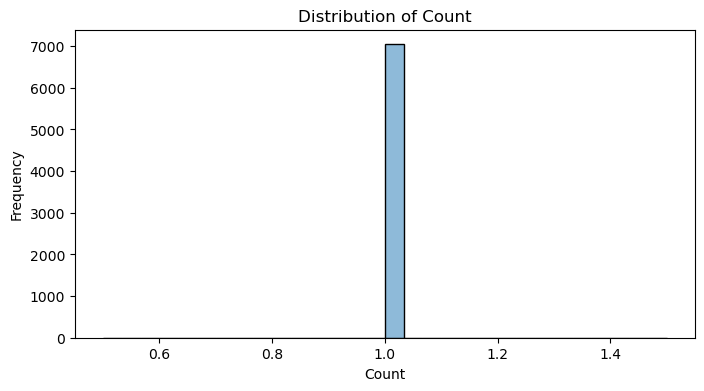

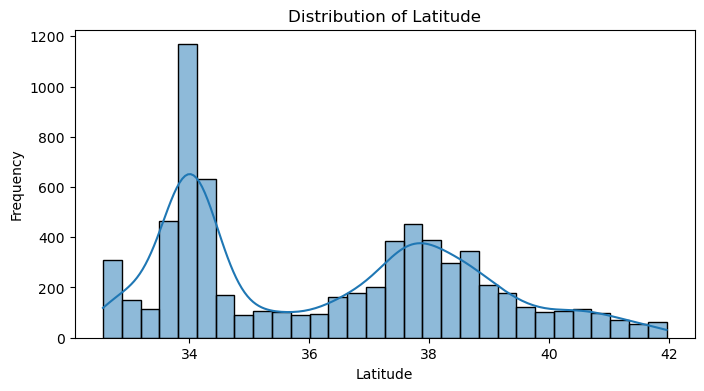

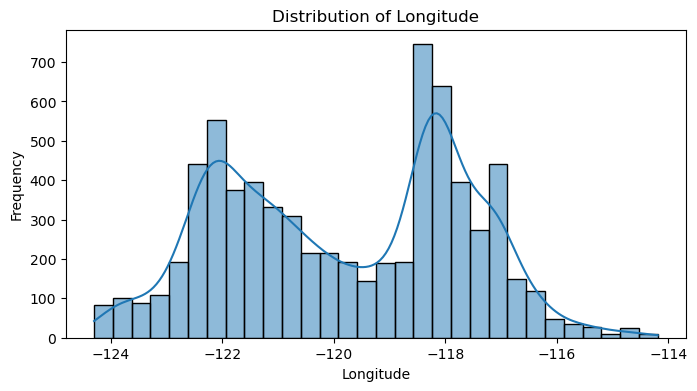

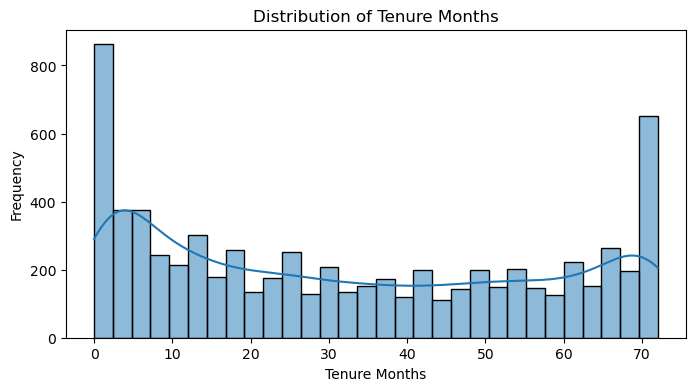

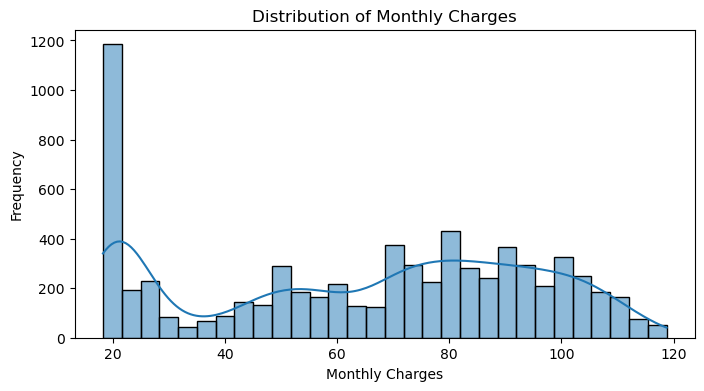

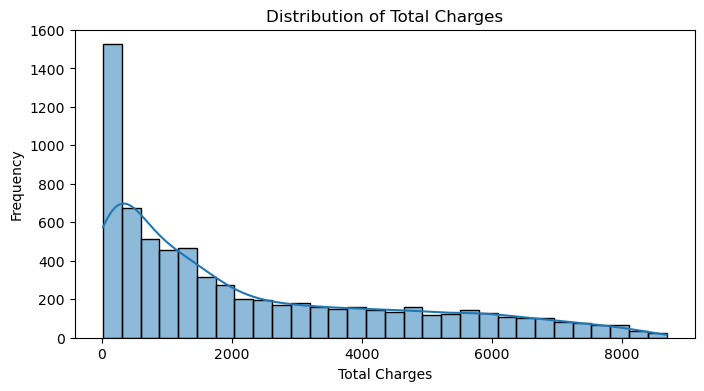

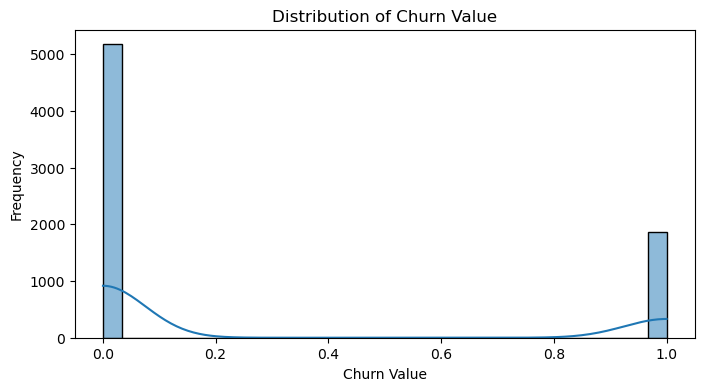

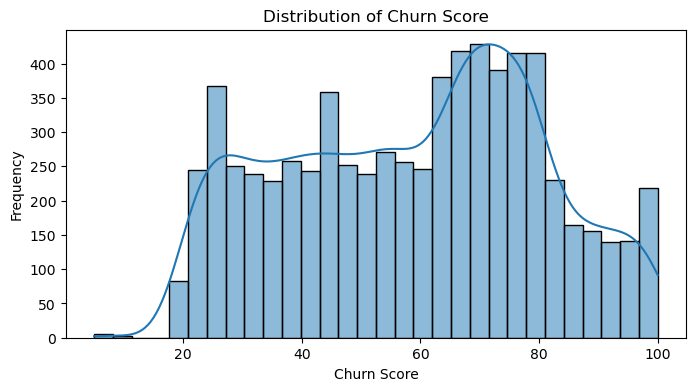

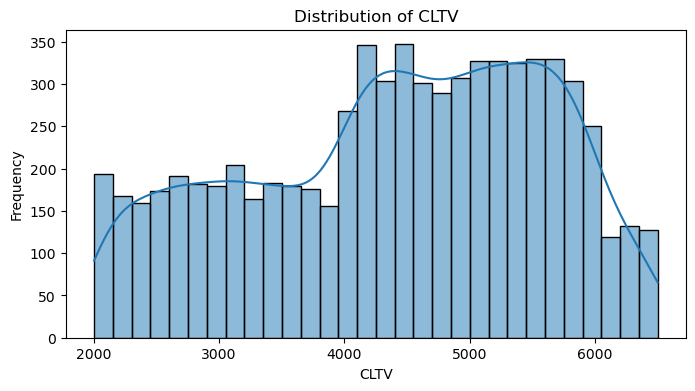

Step 2.3: Visualizing Categorical Distributions


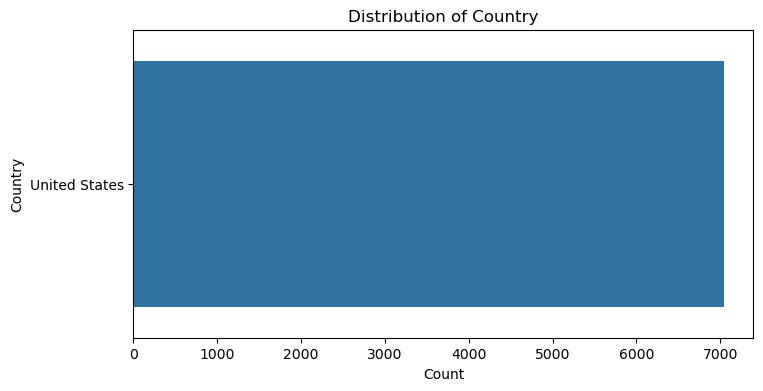

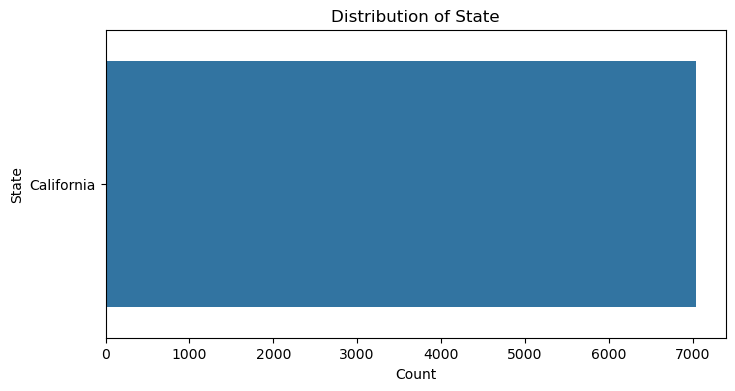

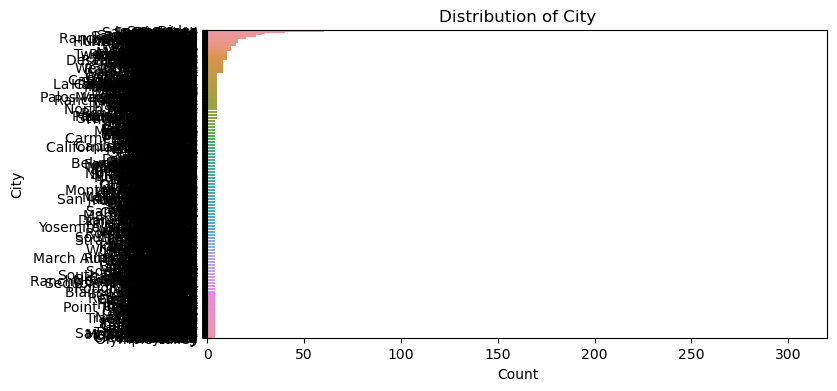

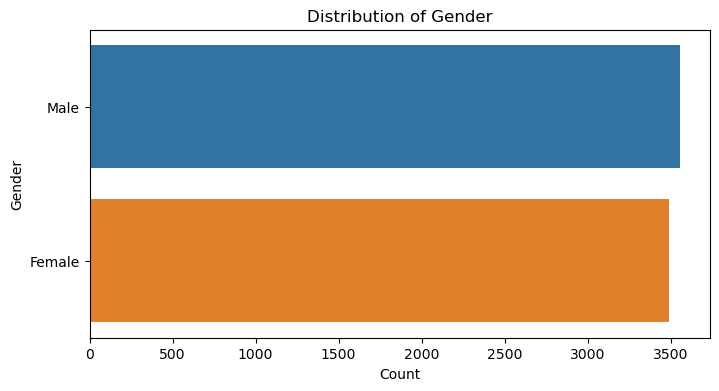

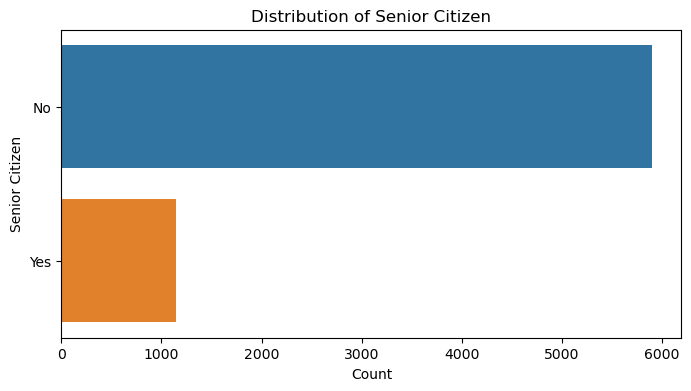

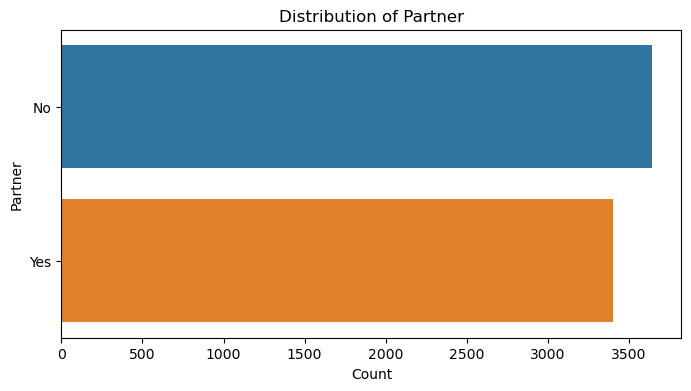

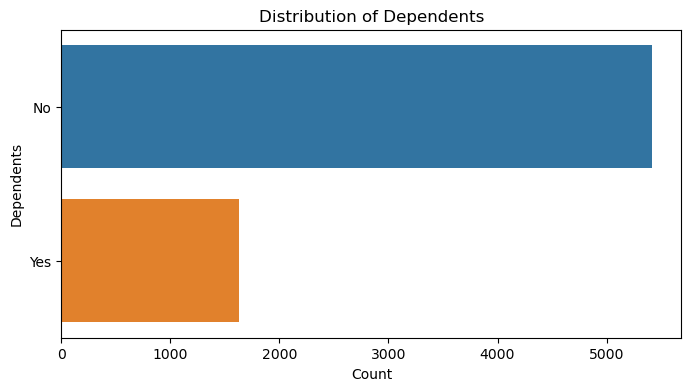

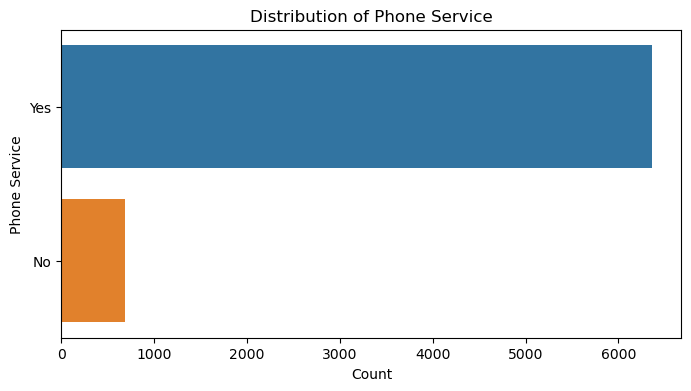

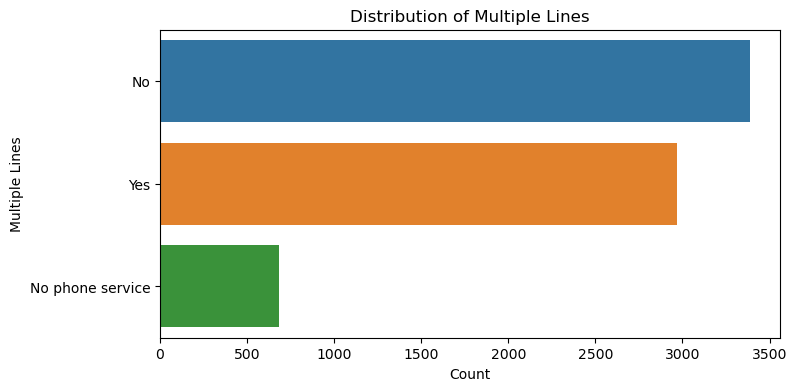

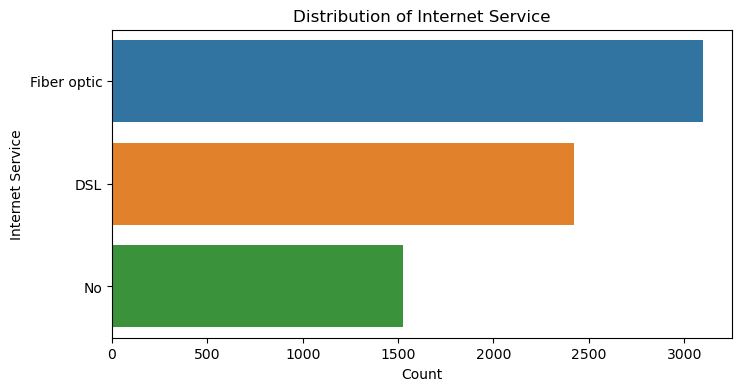

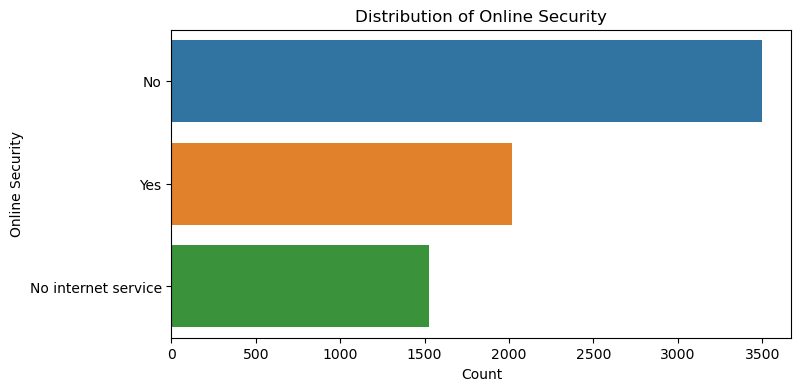

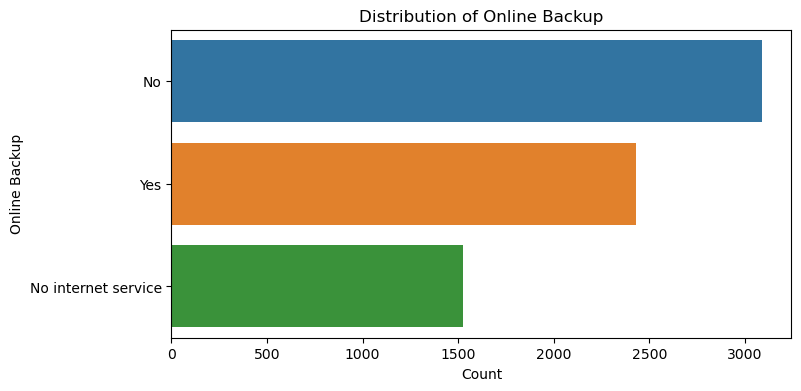

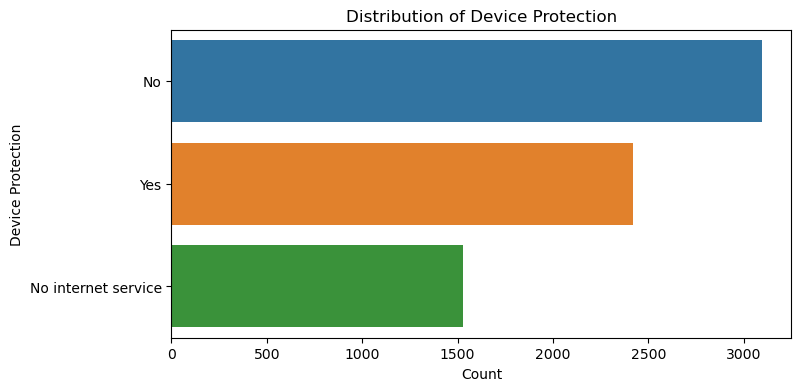

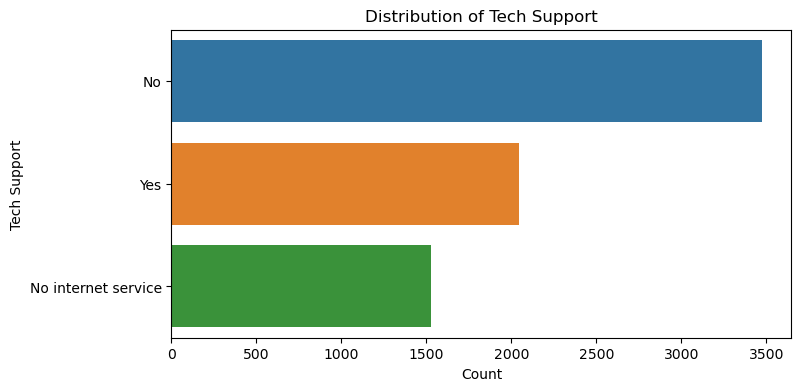

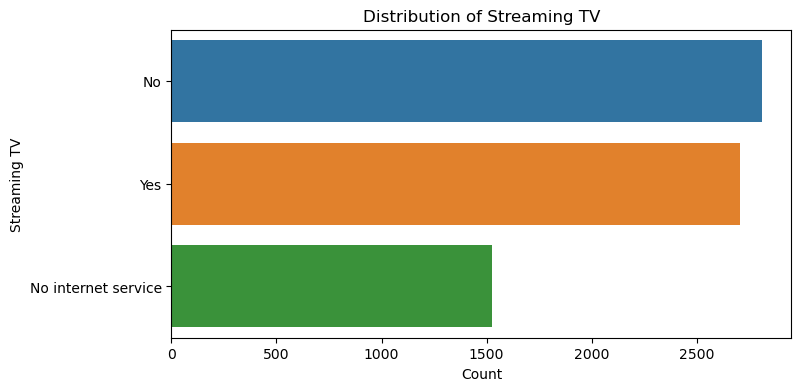

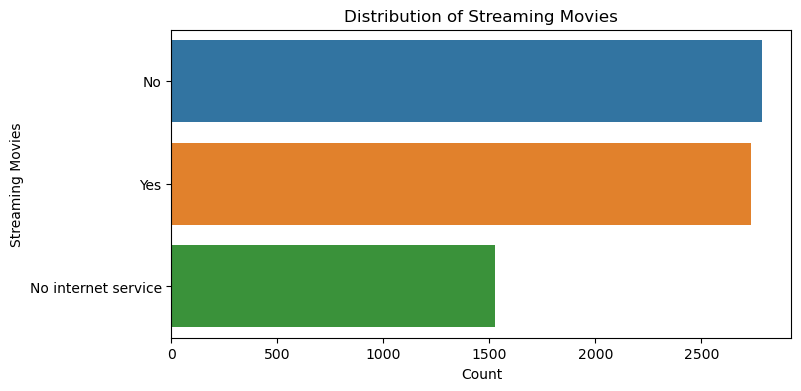

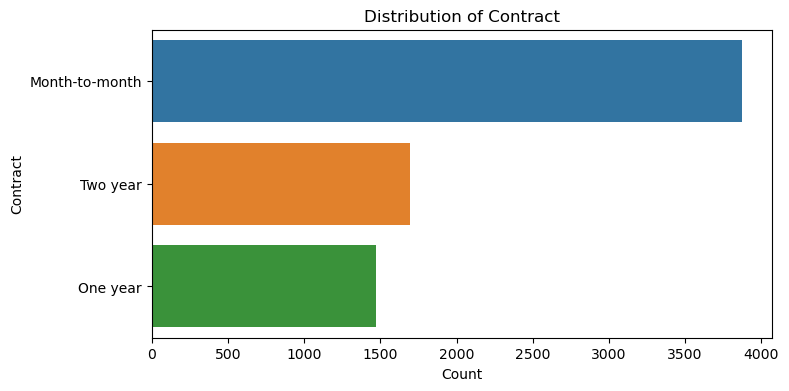

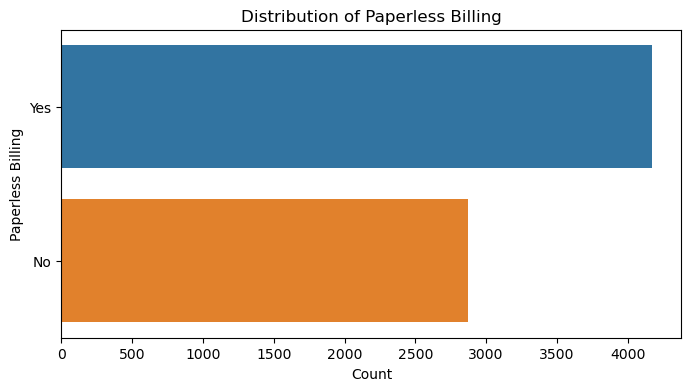

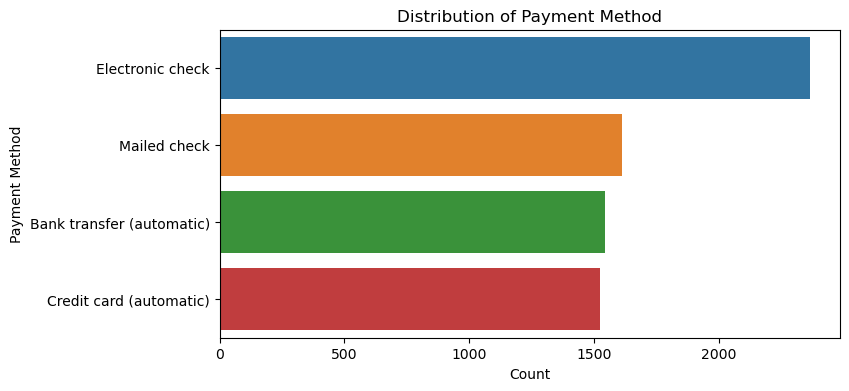

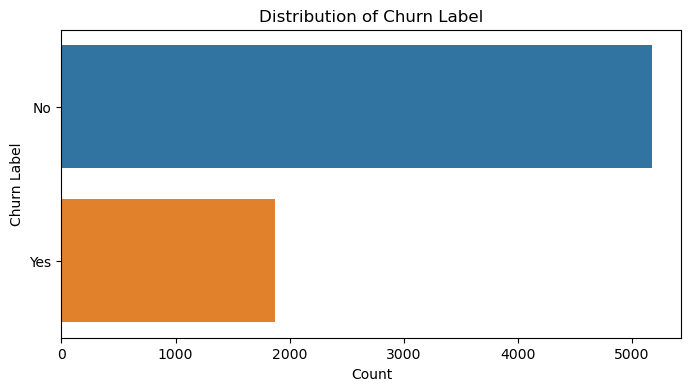

Step 2.4: Correlation Analysis


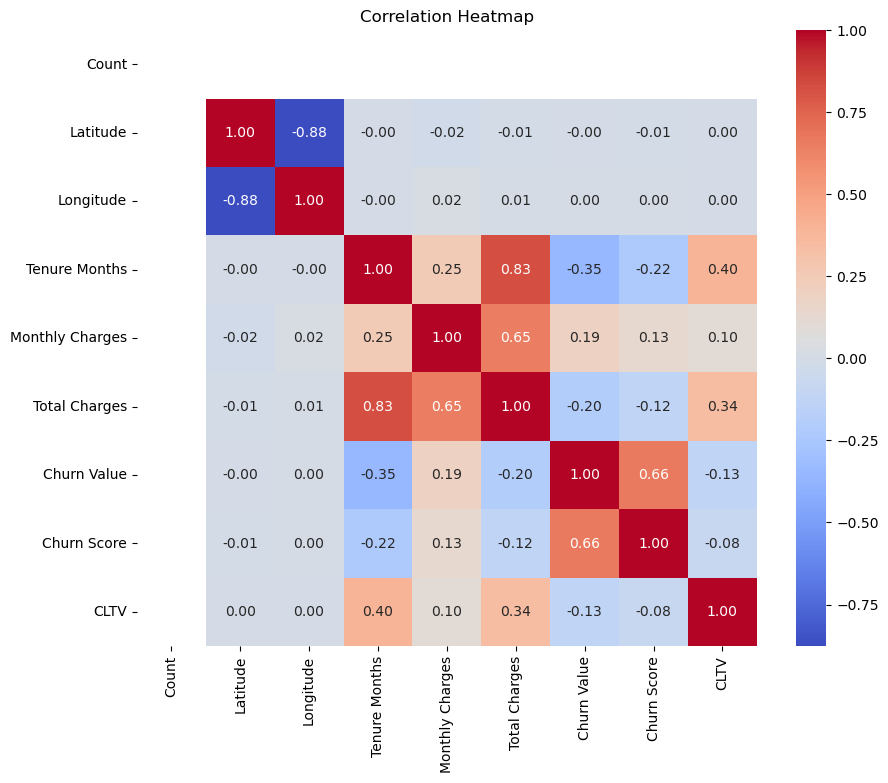

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2.1: Descriptive Statistics
print("Step 2.1: Descriptive Statistics")
numerical_stats = df_cleaned.describe()
print(numerical_stats, "\n")

# Step 2.2: Value Counts for Categorical Columns
print("Step 2.2: Value Counts for Categorical Columns")
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

categorical_distributions = {}
for col in categorical_columns:
    value_counts = df_cleaned[col].value_counts()
    categorical_distributions[col] = value_counts
    print(f"Value counts for '{col}':\n{value_counts}\n")

# Prepare for Step 2.3: Visualizations
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Step 2.3: Visualizations (Histograms for Numerical Columns)
print("Step 2.3: Visualizing Numerical Distributions")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Step 2.3: Visualizations (Bar Charts for Categorical Columns)
print("Step 2.3: Visualizing Categorical Distributions")
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cleaned, y=col, order=df_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

# Step 2.4: Correlation Heatmap for Numerical Columns
print("Step 2.4: Correlation Analysis")
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Step 3.1: Demographic Breakdown
Value counts for 'Gender':
Gender
Male      3555
Female    3488
Name: count, dtype: int64



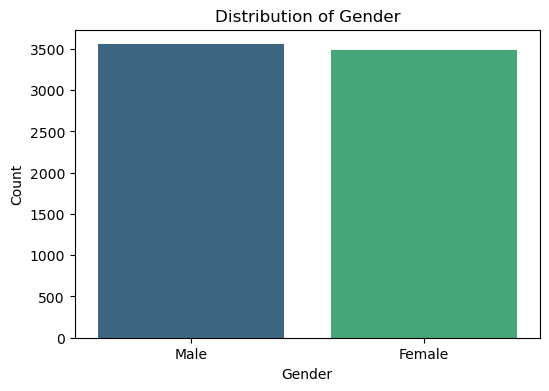

Value counts for 'Senior Citizen':
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64



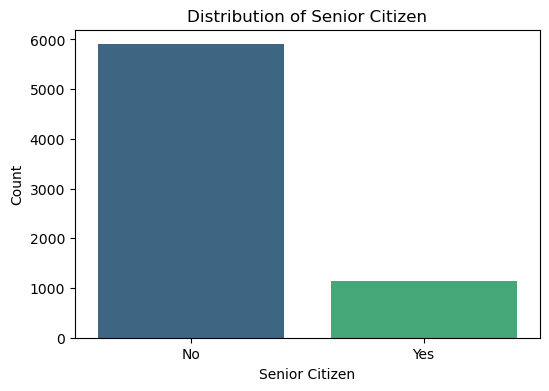

Value counts for 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64



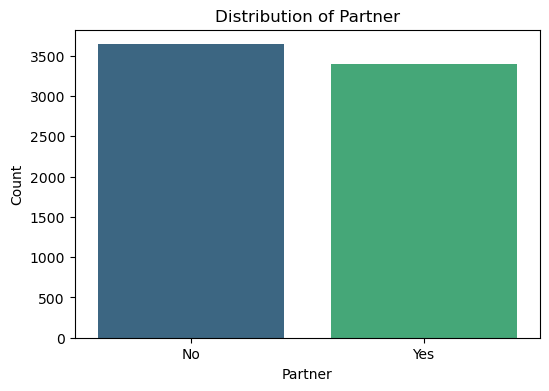

Value counts for 'Dependents':
Dependents
No     5416
Yes    1627
Name: count, dtype: int64



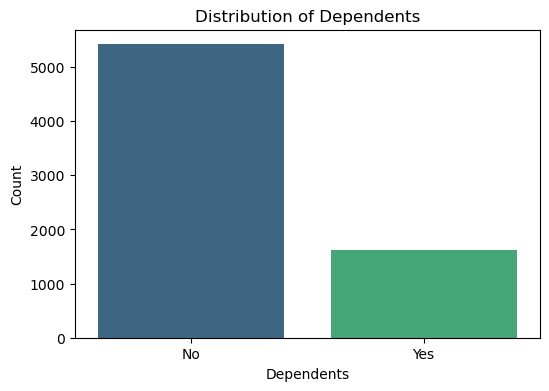

Step 3.2: Churn Analysis by Demographics
Churn Rate by 'Gender':
Gender
Female    0.269209
Male      0.261603
Name: Churn Value, dtype: float64



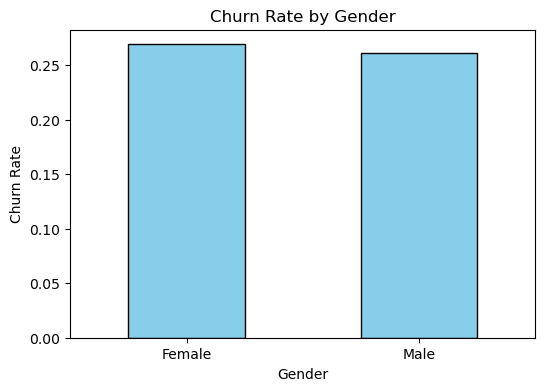

Churn Rate by 'Senior Citizen':
Senior Citizen
No     0.236062
Yes    0.416813
Name: Churn Value, dtype: float64



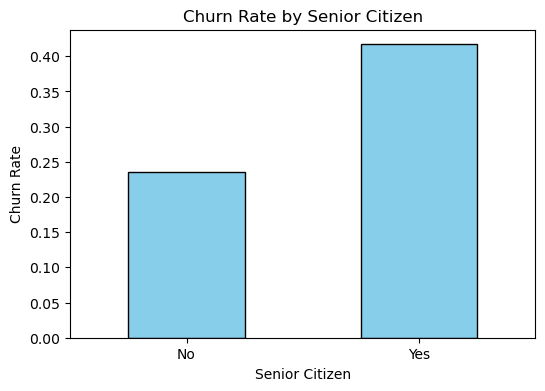

Churn Rate by 'Partner':
Partner
No     0.329580
Yes    0.196649
Name: Churn Value, dtype: float64



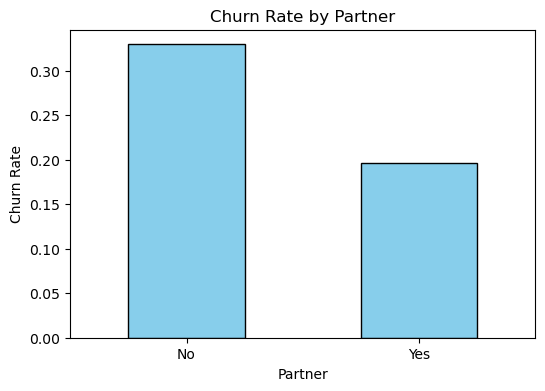

Churn Rate by 'Dependents':
Dependents
No     0.325517
Yes    0.065151
Name: Churn Value, dtype: float64



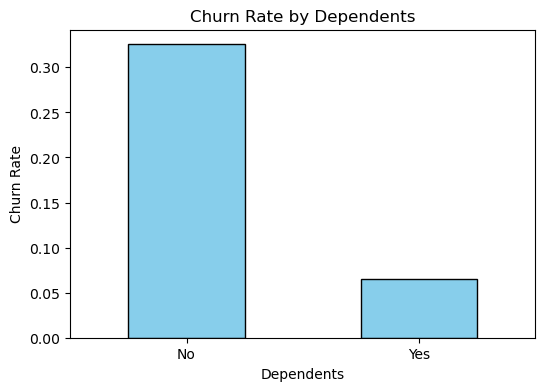

Step 3.3: Geographic Trends
Top 10 States by Churn Rate:
State
California    0.26537
Name: Churn Value, dtype: float64 



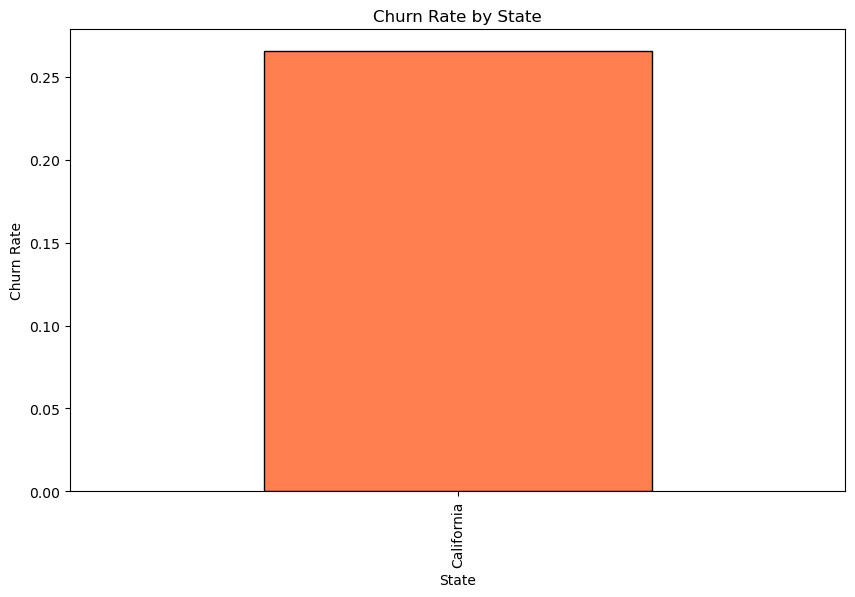

In [11]:
print("Step 3.1: Demographic Breakdown")
demographic_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

for col in demographic_columns:
    print(f"Value counts for '{col}':\n{df_cleaned[col].value_counts()}\n")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Step 3.2: Churn Analysis by Demographics
print("Step 3.2: Churn Analysis by Demographics")
for col in demographic_columns:
    churn_distribution = df_cleaned.groupby(col)['Churn Value'].mean()
    print(f"Churn Rate by '{col}':\n{churn_distribution}\n")
    plt.figure(figsize=(6, 4))
    churn_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.show()

# Step 3.3: Geographic Trends
print("Step 3.3: Geographic Trends")
state_churn = df_cleaned.groupby('State')['Churn Value'].mean().sort_values(ascending=False)
print("Top 10 States by Churn Rate:")
print(state_churn.head(10), "\n")

plt.figure(figsize=(10, 6))
state_churn.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Churn Rate by State")
plt.xlabel("State")
plt.ylabel("Churn Rate")
plt.xticks(rotation=90)
plt.show()

Step 4.1: Service Usage Analysis
Value counts for 'Phone Service':
Phone Service
Yes    6361
No      682
Name: count, dtype: int64



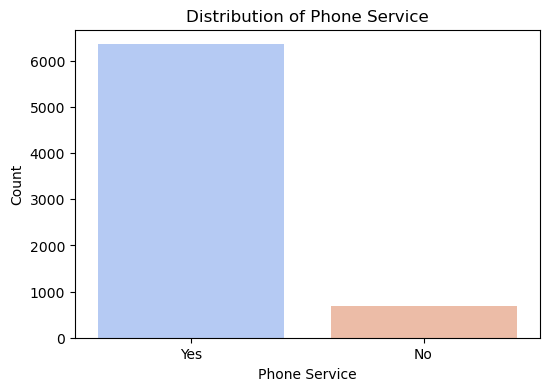

Value counts for 'Multiple Lines':
Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64



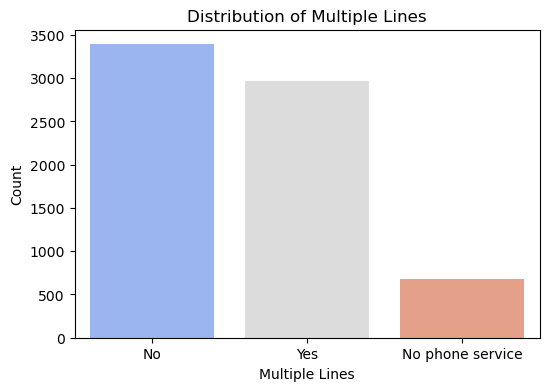

Value counts for 'Internet Service':
Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64



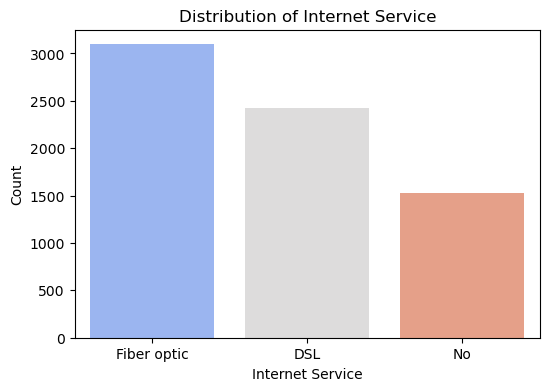

Value counts for 'Online Security':
Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64



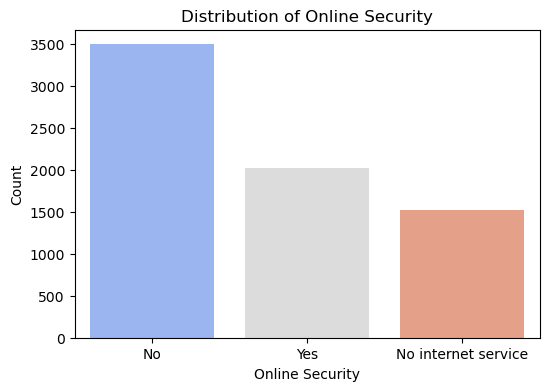

Value counts for 'Online Backup':
Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64



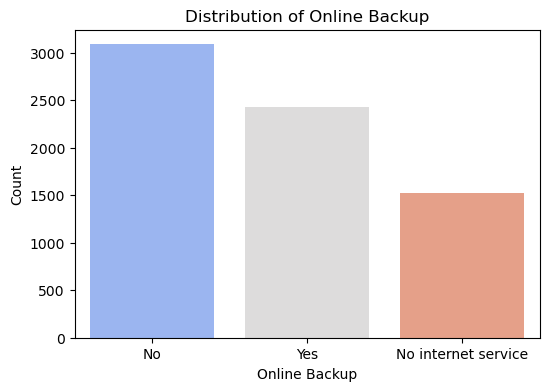

Value counts for 'Device Protection':
Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64



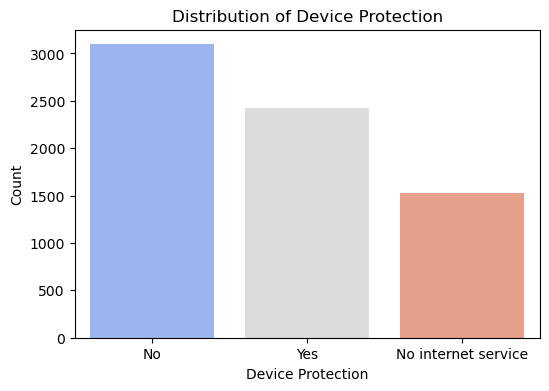

Value counts for 'Tech Support':
Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64



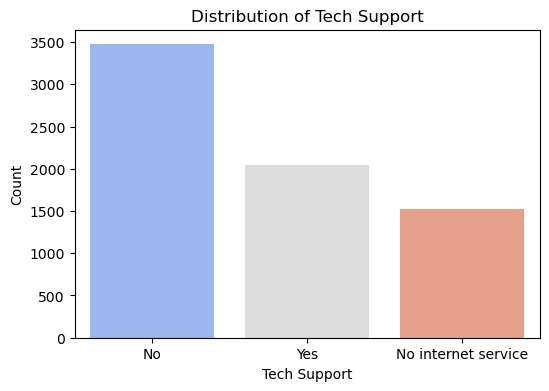

Value counts for 'Streaming TV':
Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64



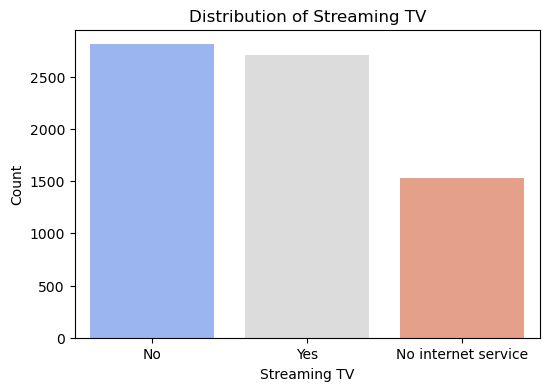

Value counts for 'Streaming Movies':
Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64



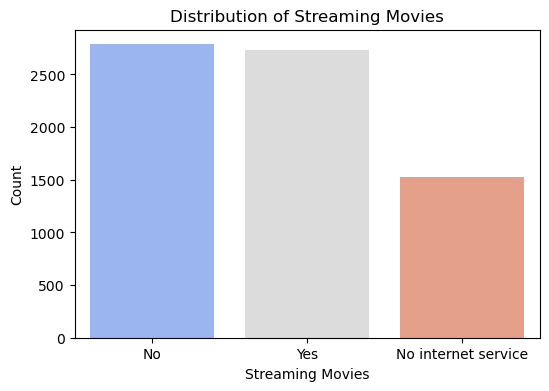

Step 4.2: Churn Analysis by Services
Churn Rate by 'Phone Service':
Phone Service
No     0.249267
Yes    0.267096
Name: Churn Value, dtype: float64



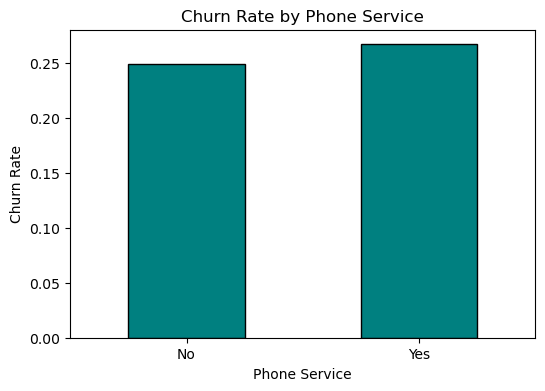

Churn Rate by 'Multiple Lines':
Multiple Lines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn Value, dtype: float64



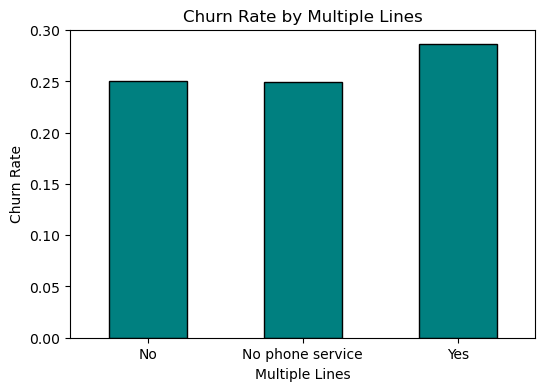

Churn Rate by 'Internet Service':
Internet Service
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn Value, dtype: float64



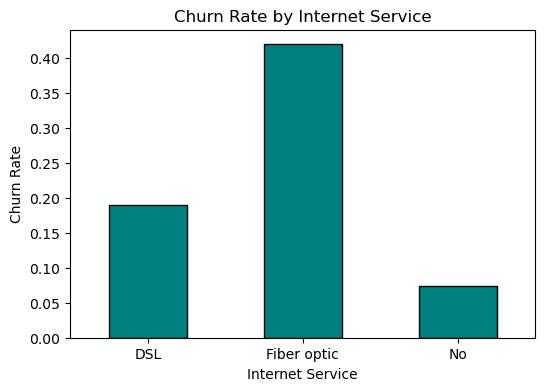

Churn Rate by 'Online Security':
Online Security
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn Value, dtype: float64



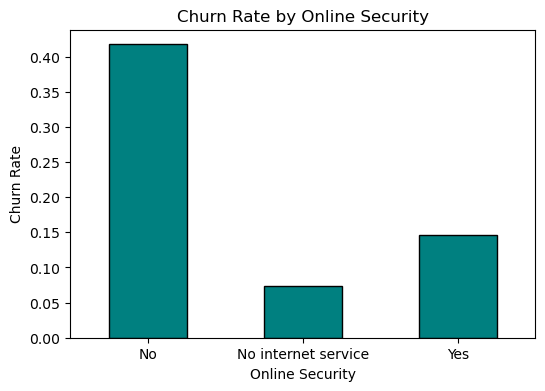

Churn Rate by 'Online Backup':
Online Backup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn Value, dtype: float64



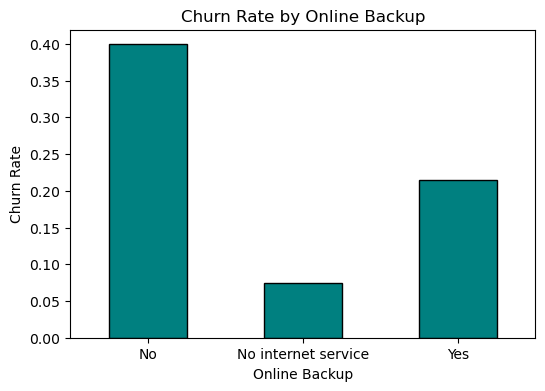

Churn Rate by 'Device Protection':
Device Protection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn Value, dtype: float64



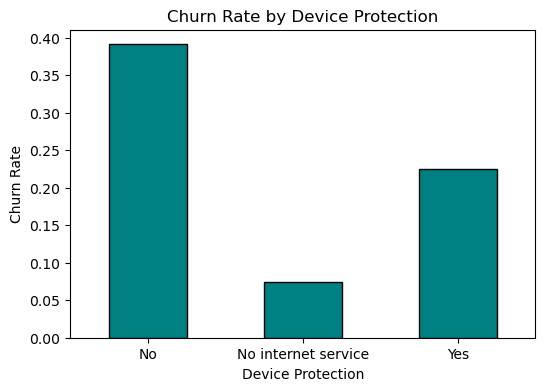

Churn Rate by 'Tech Support':
Tech Support
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn Value, dtype: float64



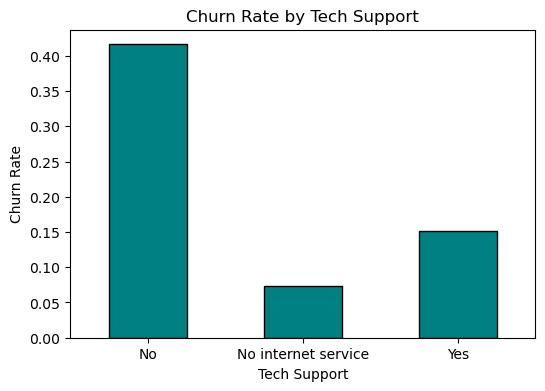

Churn Rate by 'Streaming TV':
Streaming TV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn Value, dtype: float64



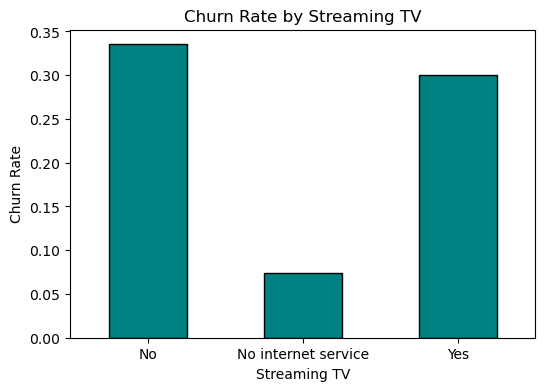

Churn Rate by 'Streaming Movies':
Streaming Movies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn Value, dtype: float64



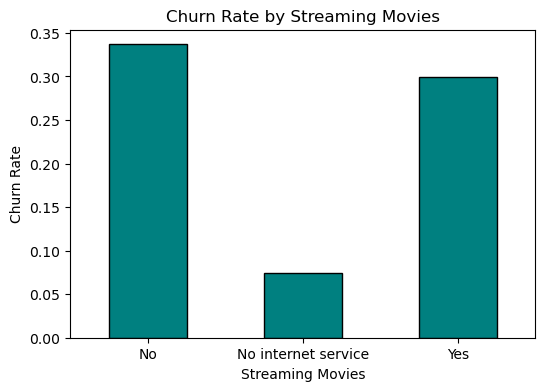

Step 4.3: Subscription Patterns
Value counts for 'Contract':
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64



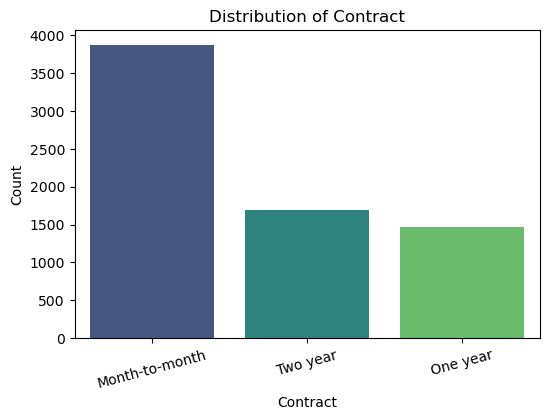

Value counts for 'Paperless Billing':
Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64



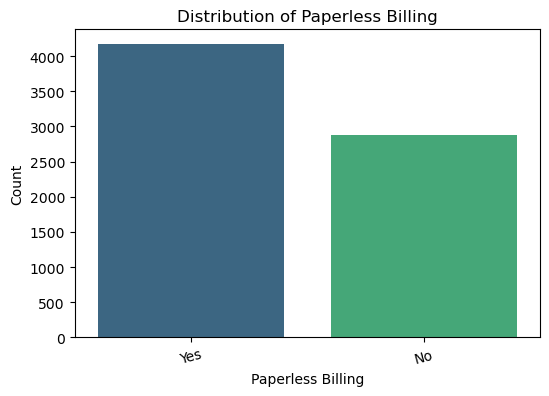

Value counts for 'Payment Method':
Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64



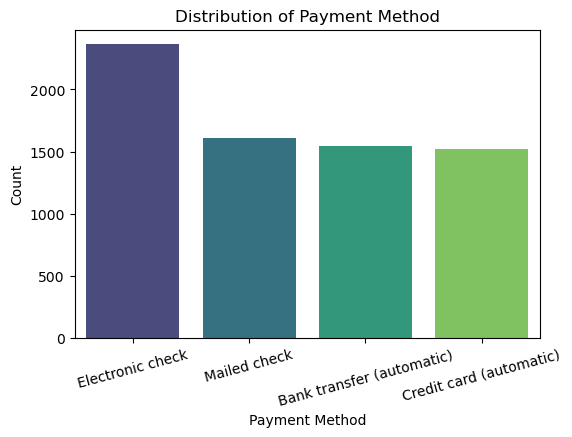

Step 4.4: Churn Analysis by Subscription Patterns
Churn Rate by 'Contract':
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64



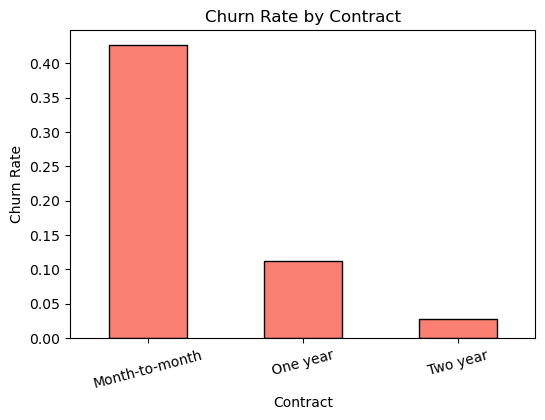

Churn Rate by 'Paperless Billing':
Paperless Billing
No     0.163301
Yes    0.335651
Name: Churn Value, dtype: float64



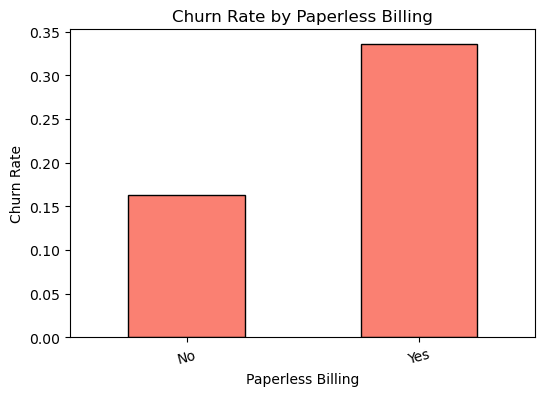

Churn Rate by 'Payment Method':
Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64



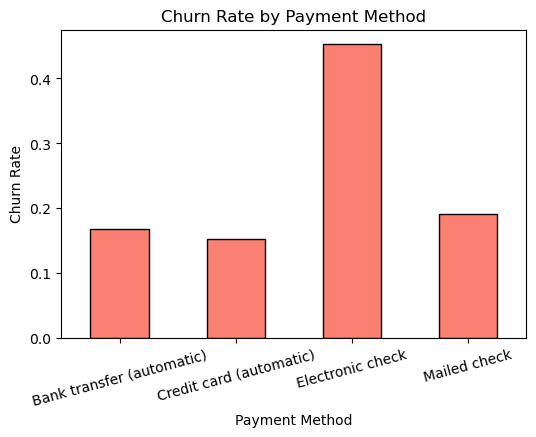

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 4.1: Service Usage Analysis")
service_columns = [
    'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies'
]

for col in service_columns:
    print(f"Value counts for '{col}':\n{df_cleaned[col].value_counts()}\n")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col, palette="coolwarm", order=df_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Step 4.2: Churn Analysis by Services
print("Step 4.2: Churn Analysis by Services")
for col in service_columns:
    churn_distribution = df_cleaned.groupby(col)['Churn Value'].mean()
    print(f"Churn Rate by '{col}':\n{churn_distribution}\n")
    plt.figure(figsize=(6, 4))
    churn_distribution.plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.show()

# Step 4.3: Subscription Patterns
print("Step 4.3: Subscription Patterns")
subscription_columns = ['Contract', 'Paperless Billing', 'Payment Method']

for col in subscription_columns:
    print(f"Value counts for '{col}':\n{df_cleaned[col].value_counts()}\n")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col, palette="viridis", order=df_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.show()

# Step 4.4: Churn Analysis by Subscription Patterns
print("Step 4.4: Churn Analysis by Subscription Patterns")
for col in subscription_columns:
    churn_distribution = df_cleaned.groupby(col)['Churn Value'].mean()
    print(f"Churn Rate by '{col}':\n{churn_distribution}\n")
    plt.figure(figsize=(6, 4))
    churn_distribution.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=15)
    plt.show()

Step 5.1: Payment Methods Analysis
Value counts for 'Payment Method':
Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64



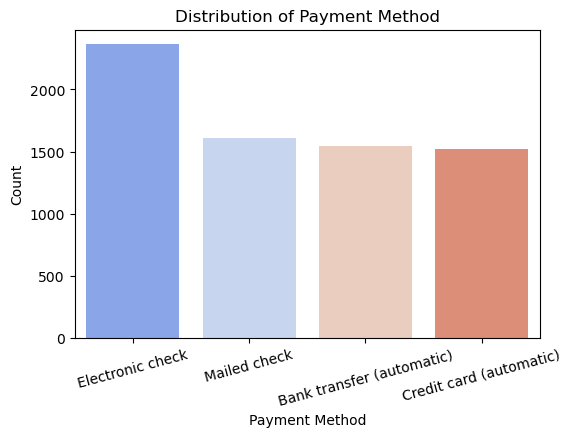

Step 5.2: Churn Analysis by Payment Methods
Churn Rate by 'Payment Method':
Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64



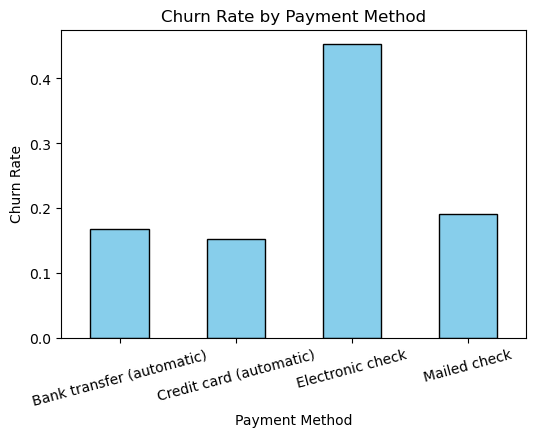

Step 5.3: Contract Type Analysis
Value counts for 'Contract':
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64



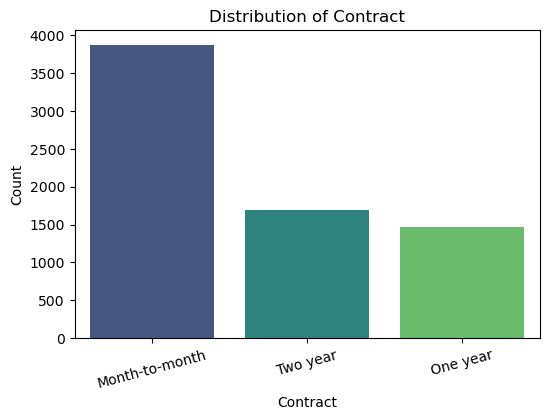

Step 5.4: Churn Analysis by Contract Type
Churn Rate by 'Contract':
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn Value, dtype: float64



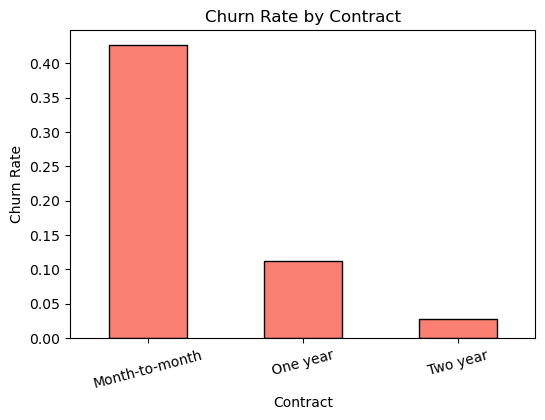

In [13]:
print("Step 5.1: Payment Methods Analysis")
payment_columns = ['Payment Method']

for col in payment_columns:
    print(f"Value counts for '{col}':\n{df_cleaned[col].value_counts()}\n")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col, palette="coolwarm", order=df_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.show()

# Step 5.2: Churn by Payment Methods
print("Step 5.2: Churn Analysis by Payment Methods")
for col in payment_columns:
    churn_distribution = df_cleaned.groupby(col)['Churn Value'].mean()
    print(f"Churn Rate by '{col}':\n{churn_distribution}\n")
    plt.figure(figsize=(6, 4))
    churn_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=15)
    plt.show()

# Step 5.3: Contract Type Analysis
print("Step 5.3: Contract Type Analysis")
contract_columns = ['Contract']

for col in contract_columns:
    print(f"Value counts for '{col}':\n{df_cleaned[col].value_counts()}\n")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col, palette="viridis", order=df_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.show()

# Step 5.4: Churn by Contract Type
print("Step 5.4: Churn Analysis by Contract Type")
for col in contract_columns:
    churn_distribution = df_cleaned.groupby(col)['Churn Value'].mean()
    print(f"Churn Rate by '{col}':\n{churn_distribution}\n")
    plt.figure(figsize=(6, 4))
    churn_distribution.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=15)
    plt.show()

Step 6.1: Correlation Analysis


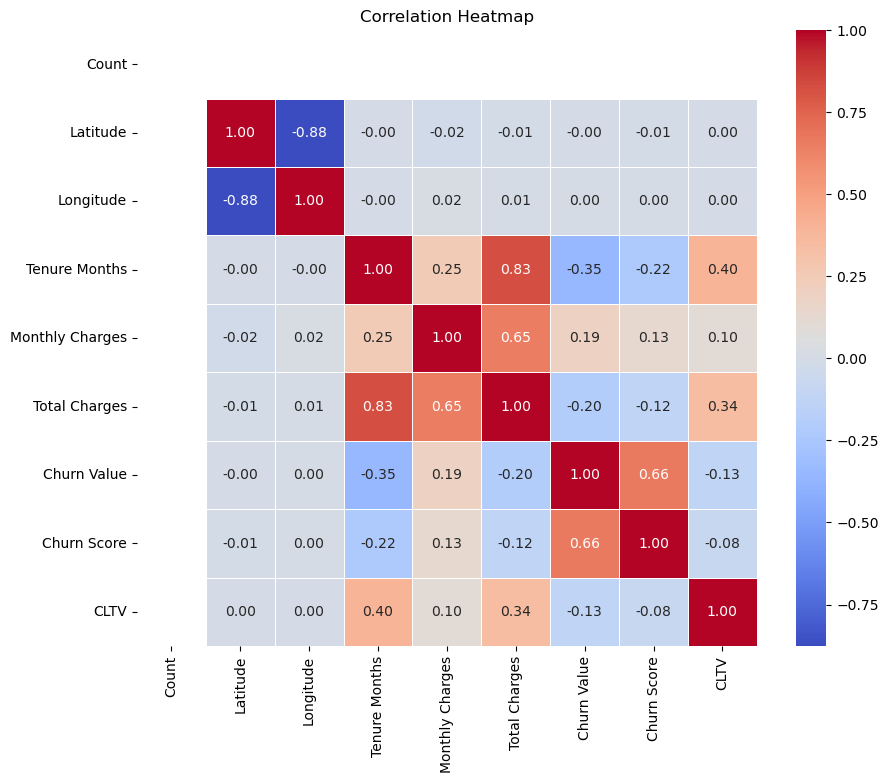

In [14]:
print("Step 6.1: Correlation Analysis")

# Select numerical columns for correlation
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Generate a correlation matrix
correlation_matrix = df_cleaned[numerical_columns].corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

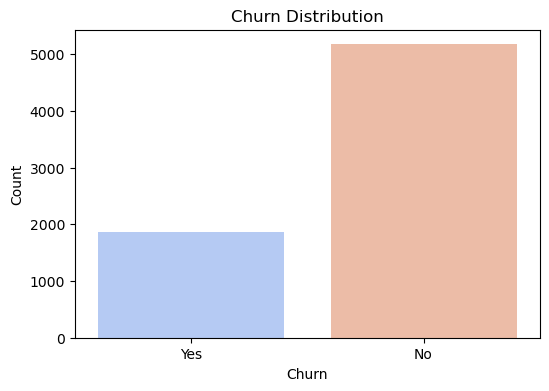

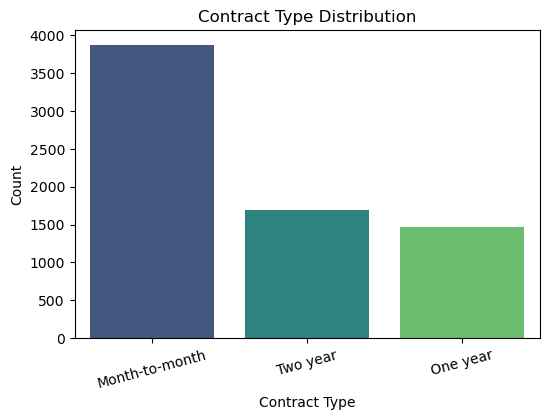

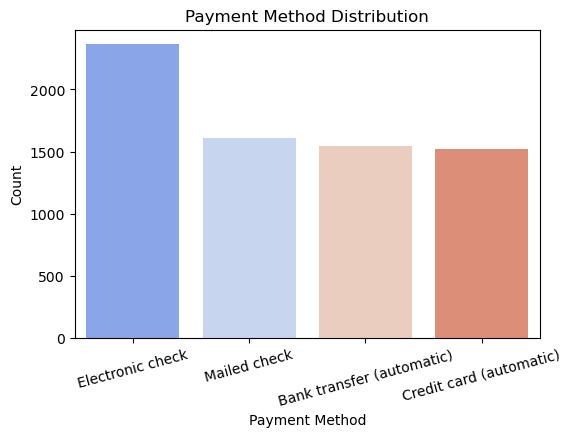

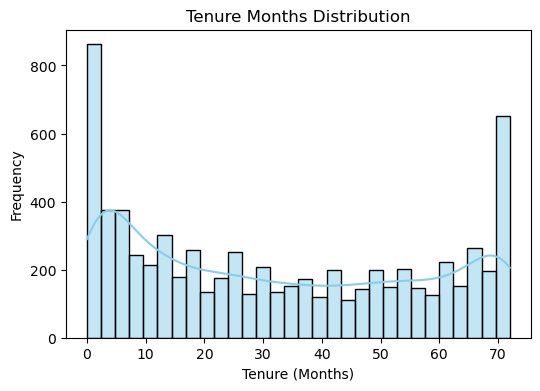

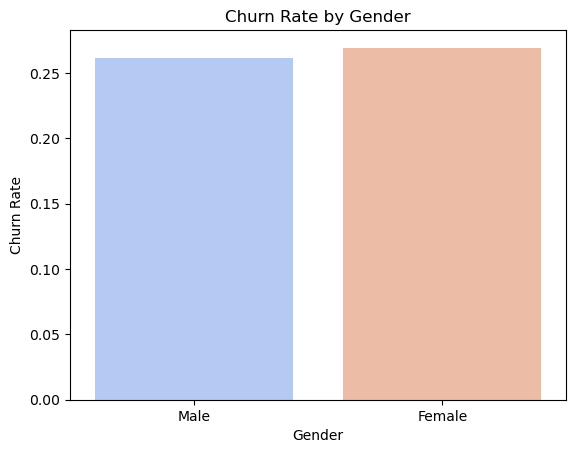

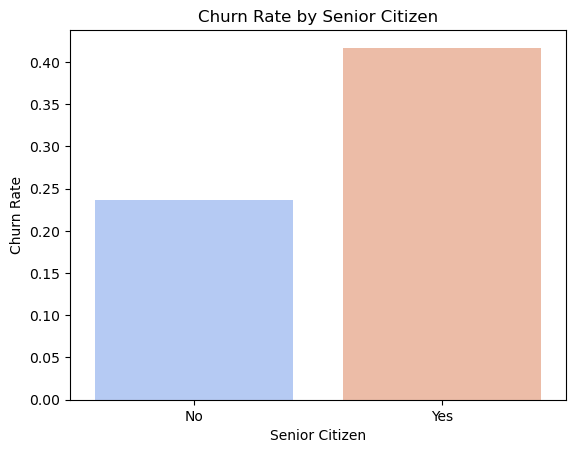

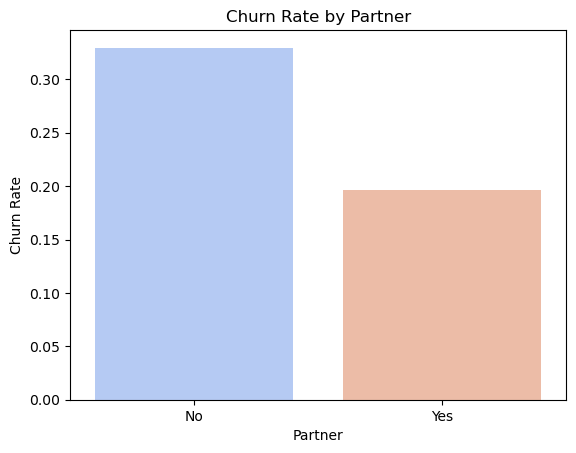

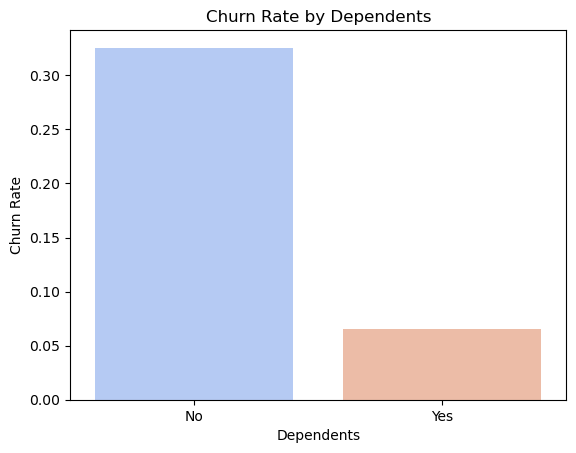

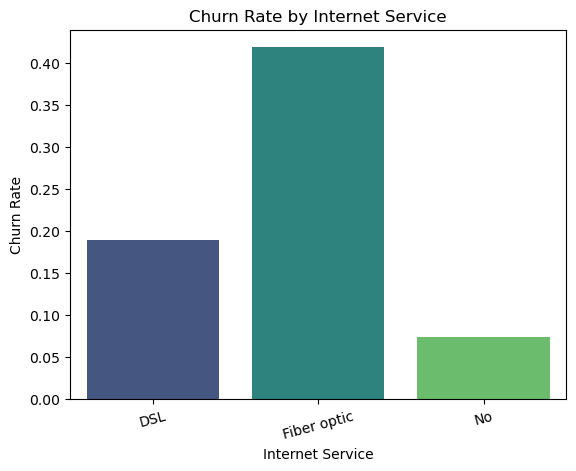

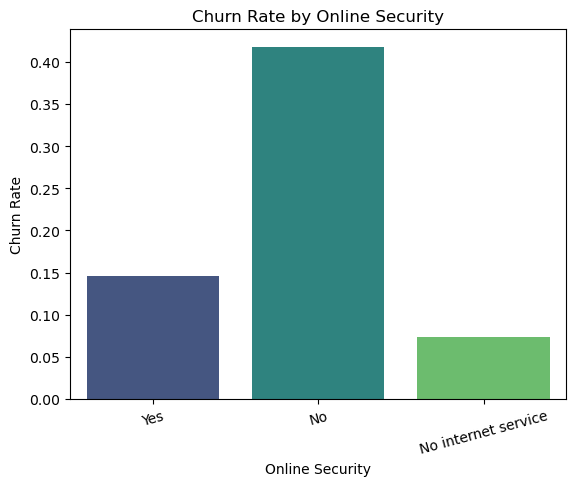

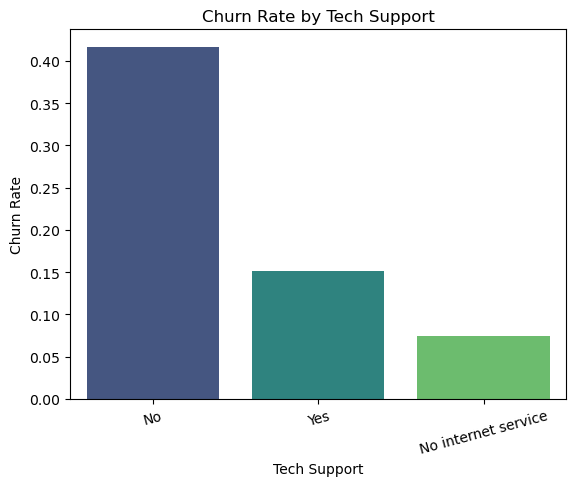

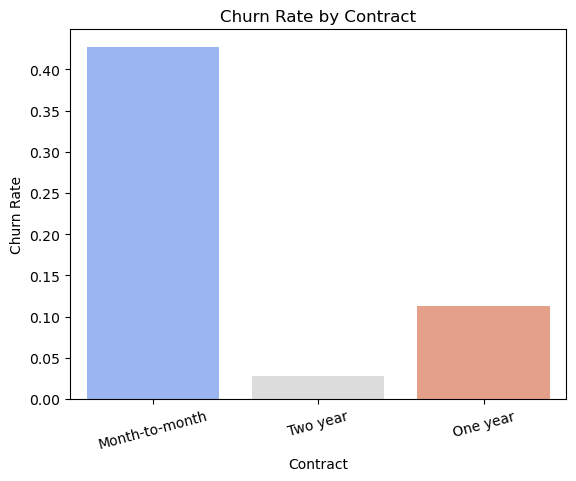

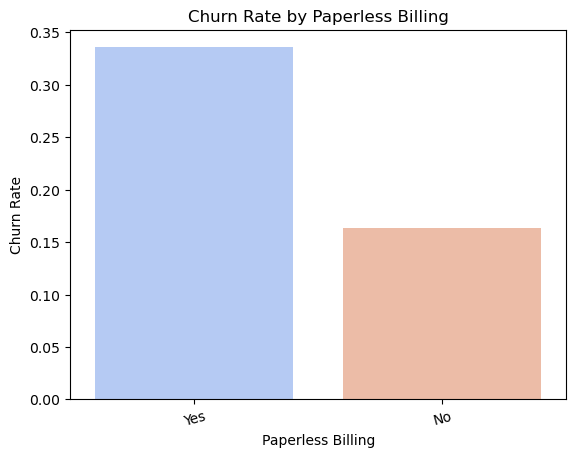

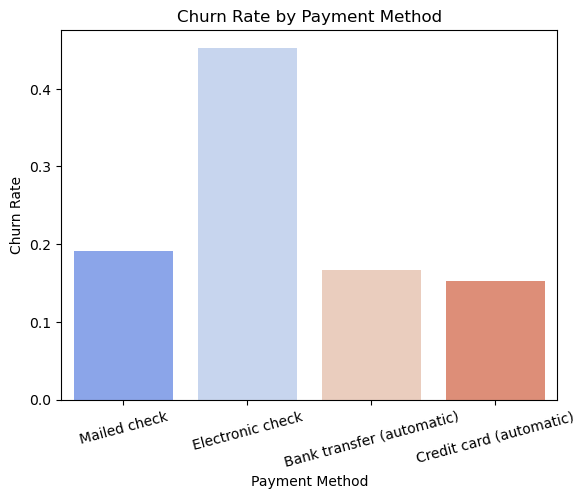

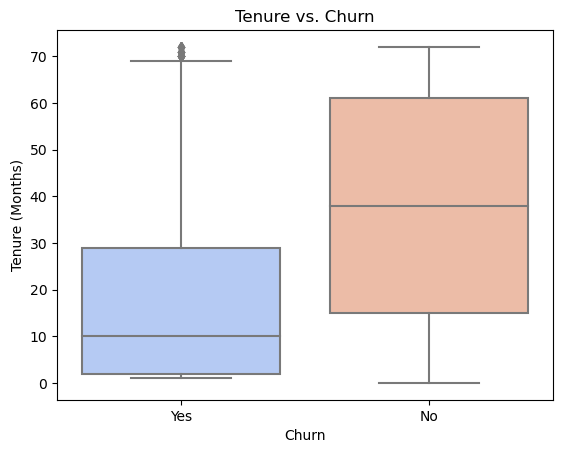

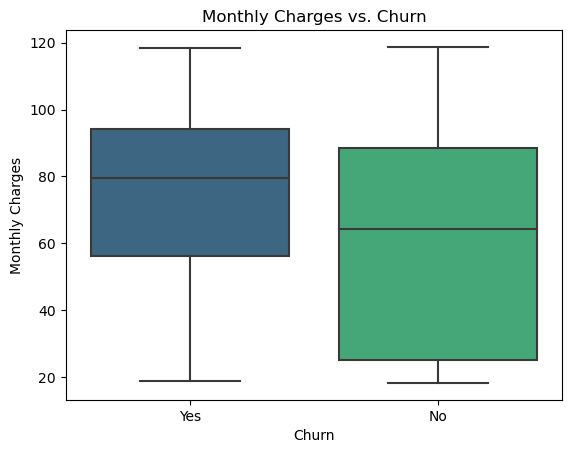

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Churn Label', palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Contract', palette="viridis", order=df_cleaned['Contract'].value_counts().index)
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Payment Method', palette="coolwarm", order=df_cleaned['Payment Method'].value_counts().index)
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['Tenure Months'], kde=True, bins=30, color='skyblue')
plt.title("Tenure Months Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

# Step 7.2: Detailed Insights
demographic_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
for col in demographic_columns:
    sns.barplot(data=df_cleaned, x=col, y='Churn Value', errorbar=None, palette="coolwarm")
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.show()

service_columns = ['Internet Service', 'Online Security', 'Tech Support']
for col in service_columns:
    sns.barplot(data=df_cleaned, x=col, y='Churn Value', errorbar=None, palette="viridis")
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=15)
    plt.show()

subscription_columns = ['Contract', 'Paperless Billing', 'Payment Method']
for col in subscription_columns:
    sns.barplot(data=df_cleaned, x=col, y='Churn Value', errorbar=None, palette="coolwarm")
    plt.title(f"Churn Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=15)
    plt.show()

# Step 7.3: Advanced Visualizations
sns.boxplot(data=df_cleaned, x='Churn Label', y='Tenure Months', palette="coolwarm")
plt.title("Tenure vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

sns.boxplot(data=df_cleaned, x='Churn Label', y='Monthly Charges', palette="viridis")
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()